# CMSC478 Machine Learning - Spring 2020

## Instructor: Fereydoon Vafaei

## <font color="blue">Assignment-4: Multi-Class Classification and Regression with Neural Networks</font>

*Type your name and ID here* 

## Overview and Learning Objectives

In Assignment-4, you're going to perform classification and regression using Neural Networks in Tensorflow and Keras.

Pedagogically, this assignment will help you:
- better understand how neural networks are built and applied on ML tasks - specifically classification and regression.
- pratice NN implementation using Tensorflow 2 and Keras.

**Notice**: While some outputs are provided as reference, other outputs are NOT shared intentionally, and you should not share them or any solution code in Piazza.

**Very Important Note:** You must run all cells and generate all outputs and plots. Notebooks with incomplete outputs will NOT be graded and will get ZERO credit! 

## Part I - Multi-Class Classification Using NN

First download the [data](https://github.com/fereydoonvafaei/CMSC478-Spring2020/blob/master/Assignment-4/video-games.csv). This is the same video games dataset you used in Assignment-2. You can read the descriptions of the data [here](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). You are going to do multi-class classification on **Rating** as you did in A2.

## <font color="red"> Required Coding

In [4]:
# Import necessary Python modules as well as Tensorflow and Keras

import pandas as pd
import tensorflow as tf
import numpy as np

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [5]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.1.0
Eager Execution mode:  True


> Load the data and do all the required preprocessing steps that you did in Assignment-2 for classification on "Rating".

In [6]:
# Load the data as a dataframe using pandas
game_data = pd.read_csv("video-games.csv")
print(game_data.shape)
game_data.head()

(16719, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


> Notice that preprocessing in A4, while extremely important to get the correct results moving forward, has no credit on its own because it's the same as A2.

### Preprocessing

In [7]:
# Drop NAs
game_data.dropna(inplace=True)
print(game_data.shape)
game_data.head()

(6825, 16)


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [8]:
# Drop "Name" column as it does not provide any useful info
game_data = game_data.drop("Name", axis=1)
print(game_data.shape)
game_data.head()

(6825, 15)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [9]:
# Drop "Global_Sales" column as it is redundant feature - it's just sum of regional and other sales
...
game_data = game_data.drop("Global_Sales", axis=1)
print(game_data.shape)
game_data.head()

(6825, 14)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [10]:
# Get feature vector X (all columns but "Rating") and target label y as "Rating"
X = game_data.drop(["Rating"], axis=1)
y = game_data["Rating"]

In [11]:
# Print X shape and head
print(X.shape)
X.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo
6,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo
7,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo


In [12]:
# Using pandas.get_dummies() create dummy variables for categorical features
X = pd.get_dummies(X)
print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,2006.0,41.36,28.96,3.77,8.45,76.0,51.0,322.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,3.29,82.0,73.0,709.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,2.95,80.0,73.0,192.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2006.0,11.28,9.14,6.50,2.88,89.0,65.0,431.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006.0,13.96,9.18,2.93,2.84,58.0,41.0,129.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Print y shape and head and its unique values
print(y.shape)
print(y.unique())
y.head()

(6825,)
['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']


0    E
2    E
3    E
6    E
7    E
Name: Rating, dtype: object

> <b>Note:</b> The output of the following cells is provided to you for your reference. All the following cells depend on the correctness of your preprocessing steps and can be verified by these outputs.

In [14]:
# Convert categorical class labels to numerical
y = y.map(lambda x: {'E' :0, 'E10+' :1, 'T' :2, 'M' :3, 'AO' :4, 'K-A' :5, 'RP' :6}.get(x))


print(y.unique())
print(y.shape)
print(type(y))
y.head()

[0 3 2 1 4 5 6]
(6825,)
<class 'pandas.core.series.Series'>


0    0
2    0
3    0
6    0
7    0
Name: Rating, dtype: int64

In [15]:
# Normalize X using mean() and std()  NOTE: The output is provided for your reference.
X = (X-X.mean())/X.std()
print(X.shape)
X.head()

(6825, 1677)


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,...,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
0,-0.341176,42.346639,41.790569,12.886767,31.004904,0.413014,1.147975,0.250716,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
2,0.133743,15.800856,18.221103,12.956315,11.884655,0.845647,2.292368,0.909519,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
3,0.371202,15.728496,15.558627,11.182831,10.624793,0.701436,2.292368,0.029412,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
6,-0.341176,11.252514,12.954346,22.380122,10.365410,1.350385,1.876225,0.436270,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105
7,-0.341176,14.022868,13.012543,9.965734,10.217191,-0.884885,0.627797,-0.077835,-0.15243,-0.045334,...,-0.029661,-0.024214,-0.034254,-0.012105,-0.020969,-0.043682,-0.012105,-0.012105,-0.01712,-0.012105


In [16]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
...
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5460, 1677)
(5460,)
(1365, 1677)
(1365,)


> Now, you should put the data into tensors. Be aware though that there are other ways to prepare the data in tensorflow.

In [17]:
# Batch train and test data
train_tensor = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
test_tensor = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))
train_batch = train_tensor.shuffle(len(X_train)).batch(10)
test_batch = test_tensor.shuffle(len(X_test)).batch(10)

In [18]:
type(train_tensor)

tensorflow.python.data.ops.dataset_ops.TensorSliceDataset

In [19]:
train_tensor.element_spec

(TensorSpec(shape=(1677,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

### Building the NN for Multi-Class Classification

> You can begin with a simple neural network with a couple of hidden layers, and increase number of hidden layers and neurons as needed. You may also use callback and early stopping to find the optimal number of epochs, but it's possible to obtain the minimum required accuracy (0.70) with 20 epochs only.

> **Hint**: During training, you should see a clear trend of descending loss and increasing accuracy epoch after epoch; otherwise, your model has not been developed properly.

> **Very Important Note**: All your cells should be run and show outputs and/or plots!

In [20]:
# Build a sequential NN with appropriate layers for multi-class classification
# Use ReLU for all hidden layers

# Hint1: input_dim of the first layer should match with the number of features in X_train

# Hint2: Notice that the activation function and number of neurons in the output layer are determined
# by the type of ML task i.e. Multi-class Classification
nn_clf = tf.keras.Sequential([
    # Add layers accordingly
    tf.keras.layers.Dense(units = 64, activation= "relu", input_dim=1677),
    tf.keras.layers.Dense(units = 64, activation= "relu"),
    tf.keras.layers.Dense(units = 64, activation= "relu"),
    tf.keras.layers.Dense(units = 8, activation= "softmax")
    ]) 

In [21]:
nn_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                107392    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 520       
Total params: 116,232
Trainable params: 116,232
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile nn_clf with loss='sparse_categorical_crossentropy' and metrics=['sparse_categorical_accuracy']
# Hint1: One of the hyperparameters you can change is the optimizer (Adam, RMSprop, SGD, ...)
# Hint2: The other impactful hyperparameter is learning_rate
optimizer = tf.keras.optimizers.Adam(0.001)
nn_clf.compile(loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'], optimizer=optimizer)

> To train the model, you use `fit()` method, and since you've created `train_batch`, you don't need to pass `y_train` as it's already included in the batch.

In [23]:
# Fit the network on train_batch with 20 epochs (you may train with more epochs or use callback if needed)
nn_clf_history = nn_clf.fit(train_batch, epochs=20)

Train for 546 steps
Epoch 1/20
546/546 [==============================] - 1s 3ms/step - loss: 1.0514 - sparse_categorical_accuracy: 0.5729
Epoch 2/20
546/546 [==============================] - 1s 2ms/step - loss: 0.5756 - sparse_categorical_accuracy: 0.7712
Epoch 3/20
546/546 [==============================] - 1s 2ms/step - loss: 0.4138 - sparse_categorical_accuracy: 0.8297
Epoch 4/20
546/546 [==============================] - 1s 2ms/step - loss: 0.3335 - sparse_categorical_accuracy: 0.8645
Epoch 5/20
546/546 [==============================] - 1s 2ms/step - loss: 0.2638 - sparse_categorical_accuracy: 0.8899
Epoch 6/20
546/546 [==============================] - 1s 2ms/step - loss: 0.2178 - sparse_categorical_accuracy: 0.9088
Epoch 7/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1590 - sparse_categorical_accuracy: 0.9374
Epoch 8/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1231 - sparse_categorical_accuracy: 0.9509
Epoch 9/20
546/546 [========

(0, 1)

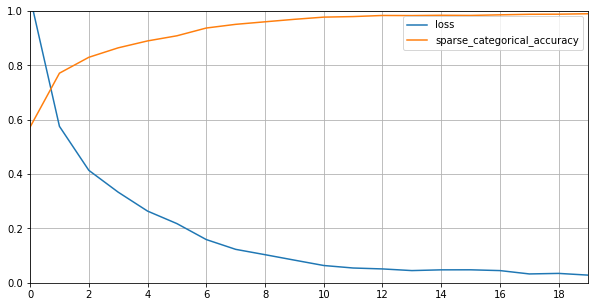

In [24]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

> To evaluate the model, you use `evaluate()` method.

> <font color='red'>**Minimum Accuracy Requirement**</font>: Your accuracy on `test_batch` must be at least **0.70**. Otherwise, your notebook will get NO CREDIT for this part, so you must fine-tune your `nn_clf` accordingly.

In [25]:
# Evaluate the model on test_batch - no need to pass y_test because it's included in test_batch
cross_entropy_loss, accuracy = nn_clf.evaluate(test_batch)

137/137 [==============================] - 0s 2ms/step - loss: 2.2496 - sparse_categorical_accuracy: 0.7026


In [26]:
# Minimum Required Accuracy: 0.70
round(accuracy, 2)

0.7

In [27]:
y_pred = nn_clf.predict_classes(X_test)

In [28]:
y_pred

array([2, 2, 2, ..., 2, 0, 0], dtype=int64)

> Get a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78       415
           1       0.44      0.45      0.44       194
           2       0.71      0.72      0.72       476
           3       0.79      0.71      0.75       280

    accuracy                           0.70      1365
   macro avg       0.68      0.67      0.67      1365
weighted avg       0.70      0.70      0.70      1365



> Next, you're going to fine-tune your learning-rate specifically. To do so and to avoid repeating the code, let's write a function.

In [30]:
def build_model():
    nn_clf = tf.keras.Sequential([
        # Add layers accordingly
        tf.keras.layers.Dense(units = 64, activation= "relu", input_dim=1677),
        tf.keras.layers.Dense(units = 32, activation= "relu"),
        tf.keras.layers.Dense(units = 16, activation= "relu"),
        tf.keras.layers.Dense(units = 8, activation= "softmax")
        ])  
    return nn_clf

> The learning rate range that you're going to investigate is between 0.001 and 0.1 with an increment step of 0.001. Use the optimizer of your choice that performed the best in your fine-tuning, and don't change it in the `for` loop.

> It's possible to try different learning rate scheduling policies, including those policies with an exponential decay rate, but you narrow down your investigation on this specific range for this part of the assignment.

> Running this cell may take a few minutes!

In [114]:
accuracies = []
learning_rates = np.arange(0.001, 0.011, 0.001)

''' Write a for loop that iterates over learning_rate
    In each iteration:
        build a new model by calling build_model(),
        compile with the optimizer of your choice and the current learning_rate,
        train on train_batch with 20 epochs,
        evaluate on test_batch and get the accuracy,
        append accuracy to accuracies
'''
for lr in learning_rates: #lr is current learning rate
    print("lr = ",lr)
    nn_clf3 = build_model()
    optimizer = tf.keras.optimizers.Adam(lr)
    nn_clf3.compile(loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'], optimizer=optimizer)
    nn_clf3_history = nn_clf3.fit(train_batch, epochs=20)
    cross_entropy_loss, accuracy = nn_clf3.evaluate(test_batch)
    accuracies.append(accuracy)

lr =  0.001
Train for 546 steps
Epoch 1/20
546/546 [==============================] - 1s 3ms/step - loss: 1.1052 - sparse_categorical_accuracy: 0.5474
Epoch 2/20
546/546 [==============================] - 1s 2ms/step - loss: 0.6056 - sparse_categorical_accuracy: 0.7619
Epoch 3/20
546/546 [==============================] - 1s 2ms/step - loss: 0.4382 - sparse_categorical_accuracy: 0.8273
Epoch 4/20
546/546 [==============================] - 1s 2ms/step - loss: 0.3496 - sparse_categorical_accuracy: 0.8592
Epoch 5/20
546/546 [==============================] - 1s 2ms/step - loss: 0.2967 - sparse_categorical_accuracy: 0.8786
Epoch 6/20
546/546 [==============================] - 1s 3ms/step - loss: 0.2453 - sparse_categorical_accuracy: 0.8995
Epoch 7/20
546/546 [==============================] - 2s 3ms/step - loss: 0.2007 - sparse_categorical_accuracy: 0.9170
Epoch 8/20
546/546 [==============================] - 2s 3ms/step - loss: 0.1602 - sparse_categorical_accuracy: 0.9383
Epoch 9/20
546/5

546/546 [==============================] - 1s 2ms/step - loss: 0.2381 - sparse_categorical_accuracy: 0.9121
Epoch 10/20
546/546 [==============================] - 1s 2ms/step - loss: 0.2273 - sparse_categorical_accuracy: 0.9163
Epoch 11/20
546/546 [==============================] - 1s 2ms/step - loss: 0.2087 - sparse_categorical_accuracy: 0.9291
Epoch 12/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1811 - sparse_categorical_accuracy: 0.9339
Epoch 13/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1452 - sparse_categorical_accuracy: 0.9498
Epoch 14/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1389 - sparse_categorical_accuracy: 0.9518
Epoch 15/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1308 - sparse_categorical_accuracy: 0.9535
Epoch 16/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1131 - sparse_categorical_accuracy: 0.9584
Epoch 17/20
546/546 [==============================]

[0.99157506, 0.99084246, 0.9860806, 0.97619045, 0.96739924, 0.9692308, 0.97399265, 0.95238096, 0.92747253, 0.939011]


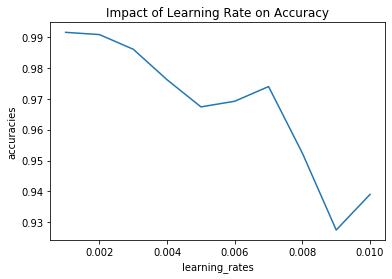

In [115]:
# Plot the "Impact of Learning Rate on Accuracy" with learning_rates on x-axis and accuracies on y_axis
# Plot must have title and axis labels. Incomplete plots will get NO CREDIT!
...
plt.title('Impact of Learning Rate on Accuracy')
plt.plot(learning_rates, accuracies)
plt.ylabel('accuracies')
plt.xlabel("learning_rates")

print(accuracies)

## Part I - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

**Q1 [5 points]** - According to your learning rate fine-tuning plot, what is a good value for learning rate?

According to the plot, the best learning rate is at 0.002 as the maximum of the plot (0.69) is with learning 0.002.

**Q2 [5 points]** - If you change the batch size in `train_batch` and `test_batch`:

(a - 2 points) would it increase or decrease the speed of training? Also, would it increase or decrease the accuracy? YOU MUST DO EXPERIMENTS and report whether training speed and accuracy increase or decrease by changing batch size.

My hypothese is that the training with take less time with the test data, as since the data with split 80/20 meaning there was more data for the netural network to train with the 80% training data; however, since the batch sizes are equal I don't not expect the speed to be much different. If I change it from test_batch to training_batch I would expect the accuracy to increase since the neural network is used the training_batch to train the network

(b - 3 points) Explain why those observations on training speed and accuracy happen.

Since the testing set and training set had the same batch size the speed between were not significant. Also the accuracy is because the neural network used to training batch to train, so using that as the test set would of course induce bias, especially when the learning rate is very low. 

**Q3 [5 points]** - Name five learning rate scheduling policies known as **learning schedules** (you may consult with the textbook), and explain each briefly in no more than two sentences.

Piecewise constant scheduling - uses a constant learning rate for a x number of epochs, then a 
small learning rate for another set number of epochs

Power constant scheduling - set the learning rate to a function, the learn rate drops at each step.

Exponential - Sets the learning rate to n(t) = no0.1^(t/s), meaning that the learning rate drop 10% after every s number of steps

Performance scheduling - measures validation error after x number of steps and reduces the learning rate when the error drops dropping

1 cycle scheduling - increases the inital learning rate and have the learning rate increase linearly, then gradually decrease the learning rate to the inital learning rate.


## Part II - Regression Using NNs

In Part II, you're going to perform regression using NNs.

You're going to predict `NA_Sales` based on other sales in the world. It is possible to frame the regression problem with other values as target, but this is how you're going to do regression practice for Part II. Notice that you should already drop `Global_Sales` from your game_data.

## <font color="red"> Required Coding

In [74]:
# Get feature vector X_reg (all columns but "NA_Sales") and target label y_reg as "NA_Sales"
X_reg = game_data.drop(["NA_Sales"], axis=1)
y_reg = game_data["NA_Sales"]

In [75]:
# Print X_reg shape and head
print(X_reg.shape)
X_reg.head()

(6825, 13)


,Platform,Year_of_Release,Genre,Publisher,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,28.96,3.77,8.45,76.0,51.0,8,322.0,Nintendo,E
2,Wii,2008.0,Racing,Nintendo,12.76,3.79,3.29,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,10.93,3.28,2.95,80.0,73.0,8,192.0,Nintendo,E
6,DS,2006.0,Platform,Nintendo,9.14,6.50,2.88,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii,2006.0,Misc,Nintendo,9.18,2.93,2.84,58.0,41.0,6.6,129.0,Nintendo,E


In [76]:
# Using pandas.get_dummies() create dummy variables for categorical features
X_reg = pd.get_dummies(X_reg)
print(X_reg.shape)
X_reg.head()

(6825, 1683)


,Year_of_Release,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,28.96,3.77,8.45,76.0,51.0,322.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2008.0,12.76,3.79,3.29,82.0,73.0,709.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,10.93,3.28,2.95,80.0,73.0,192.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,2006.0,9.14,6.50,2.88,89.0,65.0,431.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
7,2006.0,9.18,2.93,2.84,58.0,41.0,129.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# Normalize X_reg using mean() and std()  NOTE: The output is provided for your reference.
X_reg = (X_reg-X_reg.mean())/X_reg.std()
print(X_reg.shape)
X_reg.head()

(6825, 1683)


,Year_of_Release,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,-0.341176,41.790569,12.886767,31.004904,0.413014,1.147975,0.250716,-0.15243,-0.045334,-0.270063,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
2,0.133743,18.221103,12.956315,11.884655,0.845647,2.292368,0.909519,-0.15243,-0.045334,-0.270063,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
3,0.371202,15.558627,11.182831,10.624793,0.701436,2.292368,0.029412,-0.15243,-0.045334,-0.270063,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
6,-0.341176,12.954346,22.380122,10.365410,1.350385,1.876225,0.436270,-0.15243,-0.045334,3.702302,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971
7,-0.341176,13.012543,9.965734,10.217191,-0.884885,0.627797,-0.077835,-0.15243,-0.045334,-0.270063,...,-0.012105,-0.01712,-0.012105,-0.012105,1.509226,-0.397162,-0.012105,-0.515485,-0.012105,-0.730971


In [78]:
# Split the data to train and test with ratio of 80/20 for train/test respectively
...
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2)
print(X_reg_train.shape)
print(y_reg_train.shape)
print(X_reg_test.shape)
print(y_reg_test.shape)

(5460, 1683)
(5460,)
(1365, 1683)
(1365,)


In [79]:
# Batch the data
train_tensor_reg = tf.data.Dataset.from_tensor_slices((X_reg_train.values, y_reg_train.values))
test_tensor_reg = tf.data.Dataset.from_tensor_slices((X_reg_test.values, y_reg_test.values))
train_batch_reg = train_tensor_reg.shuffle(len(X_reg_train)).batch(10)
test_batch_reg = test_tensor_reg.shuffle(len(X_reg_test)).batch(10)

In [80]:
train_tensor_reg.element_spec

(TensorSpec(shape=(1683,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.float64, name=None))

### Building NN for Regression

In [167]:
# Build a sequential NN with appropriate layers for regression
# Use ReLU for all hidden layers

# Hint1: input_dim of the first layer should match with the number of features in X_train_reg
# Hint2: Notice that the activation function and number of neurons in the output layer are determined
# by the type of ML task i.e. Regression

nn_reg = tf.keras.Sequential([
    # Add layers accordingly
    tf.keras.layers.Dense(units = 32, activation= "relu", input_dim=1683),
    tf.keras.layers.Dense(units = 16, activation= "relu"),
    tf.keras.layers.Dense(units = 1)
    ]) 

In [168]:
nn_reg.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                53888     
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 17        
Total params: 54,433
Trainable params: 54,433
Non-trainable params: 0
_________________________________________________________________


In [169]:
# Compile nn_reg with appropriate loss and metric

# Hint1: You need to choose the loss and metric for regression
# Hint2: For this regression task, loss and metrics might be the same
nn_reg.compile(loss='mse',metrics=['mse'])

In [170]:
# Fit the network on train_batch_reg with 20 epochs
nn_reg_history = nn_reg.fit(train_batch_reg, epochs=20)

Train for 546 steps
Epoch 1/20
546/546 [==============================] - 1s 2ms/step - loss: 1.1579 - mse: 1.1579
Epoch 2/20
546/546 [==============================] - 1s 2ms/step - loss: 0.3886 - mse: 0.3886
Epoch 3/20
546/546 [==============================] - 1s 2ms/step - loss: 0.2806 - mse: 0.2806
Epoch 4/20
546/546 [==============================] - 1s 2ms/step - loss: 0.2523 - mse: 0.2523
Epoch 5/20
546/546 [==============================] - 1s 2ms/step - loss: 0.2101 - mse: 0.2101
Epoch 6/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1853 - mse: 0.1853
Epoch 7/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1905 - mse: 0.1905
Epoch 8/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1520 - mse: 0.1520
Epoch 9/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1496 - mse: 0.1496
Epoch 10/20
546/546 [==============================] - 1s 2ms/step - loss: 0.1454 - mse: 0.1454
Epoch 11/20
546/546 [========

(0, 1)

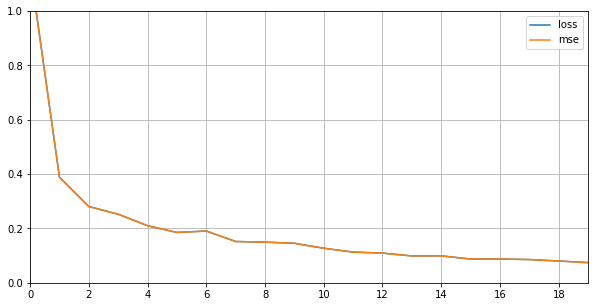

In [171]:
pd.DataFrame(nn_reg_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

> <font color='red'>**Maximum Acceptable Loss Requirement**</font>: Your loss on `test_batch_reg` should not exceed **0.15**. Otherwise, your notebook will get NO CREDIT for this part, so you must fine-tune your `nn_reg` accordingly.

In [172]:
# Evaluate the model on test_batch_reg
loss, metric = nn_reg.evaluate(test_batch_reg)

137/137 [==============================] - 0s 1ms/step - loss: 0.1536 - mse: 0.1522


In [173]:
# Maximum acceptable loss: 0.15
round(loss, 2)

0.15

> Next, you're going to build another NN and use callback and early stopping to determine the optimal number of epochs.

In [81]:
# Build a sequential NN with appropriate layers for regression
# Use ReLU for all hidden layers

# Hint1: input_dim of the first layer should match with the number of features in X_train_reg
# Hint2: Notice that the activation function and number of neurons in the output layer are determined
# by the type of ML task i.e. Regression

nn_reg2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 32, activation= "relu", input_dim=1683),
    tf.keras.layers.Dense(units = 16, activation= "relu"),
    tf.keras.layers.Dense(units = 1)
    ]) 

In [82]:
# Create an optimizer of your choice with a learning rate of 0.001
optimizer = tf.keras.optimizers.Adam(0.001)

> Next, you're going to create `callbacks` and `EarlyStopping`.

> **Note:** The `patience` parameter is the number of epochs to monitor for improvement. You may want to look up textbook examples to learn how to do this, but notice that there is no validation data here.

In [83]:
# Create a tf.keras.callbacks with EarlyStopping method and monitor='loss' and patience=10 
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

In [84]:
# Compile nn_reg2 with appropriate loss, optimizer=optimizer and TWO metrics for regression
# Hint: The two metrics must be both for regression, and one of them may be the same as loss
nn_reg2.compile(optimizer=optimizer, loss='mse', metrics=['mae','mse'])

> Now run the training, sit back and let tf/keras determine the optimal number of epochs!

In [85]:
EPOCHS = 1000
# Fit nn_reg2 on train_batch_reg, epochs=EPOCHS, callbacks=[early_stop]
nn_reg2_history = nn_reg2.fit(train_batch_reg, epochs=EPOCHS, callbacks=[early_stop])

Train for 546 steps
Epoch 1/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.8052 - mae: 0.4484 - mse: 0.8052
Epoch 2/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.4371 - mae: 0.3195 - mse: 0.4371
Epoch 3/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.2773 - mae: 0.2645 - mse: 0.2773
Epoch 4/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.1965 - mae: 0.2345 - mse: 0.1965
Epoch 5/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.1595 - mae: 0.2152 - mse: 0.1595
Epoch 6/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.1269 - mae: 0.1922 - mse: 0.1269
Epoch 7/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.1174 - mae: 0.1844 - mse: 0.1174
Epoch 8/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.0947 - mae: 0.1716 - mse: 0.0947
Epoch 9/1000
546/546 [==============================] - 1s 2ms/step - loss: 0.0815 - mae: 0.

(0, 1)

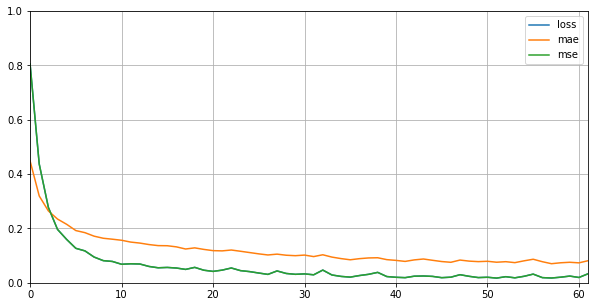

In [86]:
pd.DataFrame(nn_reg2_history.history).plot(figsize=(10, 5))
plt.grid(True)

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

## Part II - Questions

ANSWER THE FOLLOWING QUESTIONS HERE:

**Q1 [5 points]** <br>
(a - 3 points) - Using eraly stopping and callbacks, how may epochs did the training run for `nn_reg2`? Find the attribute in history object that logs number of epochs. Write the code to get number of epochs in the following cell.

The training ran for 62 epochs out of the 1000 epochs until it stopped 

(b - 2 points) - How did the training stop? Your answer should exactly mention the criteria for when the training stops. EXPLAIN CLEARLY AND COMPLETELY IN NO MORE THAN TWO SENTENCES!

In [121]:
# Get number of epochs from history object (Hint: it would return a list)
print(nn_reg2_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


**Q2 [5 points]** - On the history plot of `nn_reg2`, you have three colors/curves, but only two of them are displayed. Explain why?

The reason is because at every epoch the mse and loss are of the same value, so the plot actually does show all three curves, but since the two metrics are the values at every step, the curves overlap entirely. 

## Grading

Assignment-4 has a maximum of 100 points. Make sure that you get the correct outputs for all cells that you implement and give complete answers to all questions. Also, your notebook should be written with no grammatical and spelling errors and should be easy-to-read.

The breakdown of the 100 points is as follows:

- Part I Classification on Rating: [total 70 points]
    - Implementation of nn_clf: 40 points - **Minimum Required Accuracy**: 0.70 otherwise ZERO CREDIT!
    - Learning rate fine-tuning plot: 15 points
    - Questions: 15 points (5 points each)


- Part II Regression on NA_Sales: [total 30 points]
    - Implementation of nn_reg: 10 points - **Maximum Acceptable Loss**: 0.15 otherwise ZERO CREDIT!
    - Early stopping of nn_reg_2: 10 points
    - Questions: 10 points (5 points each)
   

<b>Note: </b>Follow the instructions of each section carefully. Up to 10 points may be deducted if your submitted notebook is not easy to read and follow or if it has grammatical, spelling or formatting issues.

Name your notebook ```Lastname-A4.ipynb```. Submit the completed notebook using the ```Assignment-4``` link on Blackboard.

Grading will be based on 

  * correct implementation and results, correct answer to the questions, and
  * readability of the notebook.
  
<font color=red><b>Due Date: Monday May 4th, 11:59PM.</b></font>